## Data Wrangling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

data_csv = 'data/scraped_data.csv'


### Cleaning up table data

In [341]:
df = pd.read_csv(data_csv)
raw_df = df # in case this is needed for lookups

# ToDo: Maybe convert into methods to tidy up this section

# Remove duplidate rows
df = df.drop_duplicates()

# Drop some not very useful columns
df = df.drop('property_id', 1)
df = df.drop('environment', 1)
df = df.drop('page_name', 1)
df = df.drop('platform', 1)
df = df.drop('property_category', 1)
df = df.drop('seller_name', 1) # we have seller_id
df = df.drop('published_date', 1) # removing for now, since timespan is only a week
df = df.drop('facility', 1) # this has been split up into individual fiels
df = df.drop('property_type', 1)  # property_type seems to always be apartment print(df.loc[df['property_type'] != 'apartment'])
df = df.drop('lease_units', 1) # lease_units seems to always be months  print(df.loc[df['lease_units'] != 'months'])
df = df.drop('county', 1) # county seems to always be Dublin   print(df.loc[df['county'] != 'Dublin'])
df = df.drop('currency', 1) # currency seems to always be €   print(df.loc[df['county'] != '€'])
df = df.drop('longitude', 1) # doesn't seem to correlate much with price
df = df.drop('latitude', 1) # doesn't seem to correlate much with price


#show missing values in each column
#print(df.isnull().sum())

# Replace area names with numbers
df['area'] = df['area'].replace('Ongar','Dublin 15').replace('Rathmines','Dublin 6')
df = df.replace({'area' : {
    'Lusk' : 'North of Dublin',
    'Skerries' : 'North of Dublin',
    'Donabate' : 'North of Dublin',
    'Balbriggan' : 'North of Dublin',
    'Malahide' : 'North of Dublin',
    'Portmarnock' : 'North of Dublin',
    'Swords' : 'North of Dublin',
    'Killiney' : 'South of Dublin',
    'Booterstown' : 'South of Dublin',
    'Stillorgan' : 'South of Dublin',
    'Dun Laoghaire' : 'South of Dublin',
    'Sandycove' : 'South of Dublin',
    'Dalkey' : 'South of Dublin',
    'Saggart' : 'South of Dublin',
    'Shankill' : 'South of Dublin',
    'Glenageary' : 'South of Dublin',
    'Monkstown' : 'South of Dublin',
    'Kilmacud' : 'South of Dublin',
    'Blackrock' : 'South of Dublin',
    'Citywest' : 'West of Dublin',
    'Lucan' : 'West of Dublin',
    'Rathcoole' : 'West of Dublin',
    'North Wall' : 'Dublin 1',
    'IFSC' : 'Dublin 1',
    'Temple Bar' : 'Dublin 2',
    'Grand Canal Dock' : 'Dublin 2',
    'North Strand' : 'Dublin 3',
    'Marino' : 'Dublin 3',
    'Clontarf' : 'Dublin 3',
    'Fairview' : 'Dublin 3',
    'Ballybough' : 'Dublin 3',
    'East Wall' : 'Dublin 3',
    'Killester' : 'Dublin 3',
    'Donnybrook' : 'Dublin 4',
    'Ringsend' : 'Dublin 4',
    'Ballsbridge' : 'Dublin 4',
    'Sandymount' : 'Dublin 4',
    'Merrion' : 'Dublin 4',
    'Raheny' : 'Dublin 5',
    'Dartry' : 'Dublin 6',
    'Rathmines' : 'Dublin 6',
    'Ranelagh' : 'Dublin 6',
    'Milltown' : 'Dublin 6',
    'Rathgar' : 'Dublin 6',
    "Harold's Cross" : "Dublin 6W",
    'Terenure' : "Dublin 6W",
    'Kimmage' : "Dublin 6W",
    'Arbour Hill': 'Dublin 7',
    'Cabra': 'Dublin 7',
    'Navan Road (D7)': 'Dublin 7',
    'Phibsborough': 'Dublin 7',
    'Smithfield': 'Dublin 7',
    'North Circular Road': 'Dublin 7',
    'Rialto': 'Dublin 8',
    'Kilmainham': 'Dublin 8',
    'Portobello': 'Dublin 8',
    'Islandbridge': 'Dublin 8',
    'Inchicore': 'Dublin 8',
    'Christchurch': 'Dublin 8',
    'South Circular Road': 'Dublin 8',
    'Beaumont': 'Dublin 9',
    'Drumcondra': 'Dublin 9',
    'Santry': 'Dublin 9',
    'Glasnevin': 'Dublin 9',
    'Cherry Orchard': 'Dublin 10',
    'Finglas': 'Dublin 11',
    'Ballymun': 'Dublin 11',
    'Ward': 'Dublin 11',
    'Perrystown': 'Dublin 12',
    'Drimnagh': 'Dublin 12',
    'Bluebell': 'Dublin 12',
    'Park West': 'Dublin 12',
    'Clarehall': 'Dublin 13',  
    'Donaghmede': 'Dublin 13',
    'Ard Na Greine': 'Dublin 13',
    'Baldoyle': 'Dublin 13',
    'Sutton': 'Dublin 13',
    'Howth': 'Dublin 13',
    'Churchtown' : 'Dublin 14',
    'Dundrum' : 'Dublin 14',
    'Clonskeagh' : 'Dublin 14',
    'Goatstown' : 'Dublin 14',
    'Rathfarnham' : 'Dublin 14',
    'Ashtown' : 'Dublin 15',
    'Royal Canal Park' : 'Dublin 15',
    'Clonsilla' : 'Dublin 15',
    'Coolmine' : 'Dublin 15',
    'Ongar' : 'Dublin 15',
    'Blanchardstown': 'Dublin 15',
    'Carpenterstown': 'Dublin 15',
    'Clonee': 'Dublin 15',
    'Castleknock': 'Dublin 15',
    'Tyrrelstown' : 'Dublin 15',
    'Porterstown' : 'Dublin 15',
    'Knocklyon' : 'Dublin 16',
    'Ballinteer' : 'Dublin 16',
    'Balgriffin' : 'Dublin 17',
    'Sandyford' : 'Dublin 18',
    'Stepaside' : 'Dublin 18',
    'Carrickmines' : 'Dublin 18',
    'Foxrock' : 'Dublin 18',
    'Leopardstown' : 'Dublin 18',
    'Cabinteely' : 'Dublin 18',
    'Rathmichael' : 'Dublin 18',
    'Kilternan' : 'Dublin 18',
    'Palmerstown': 'Dublin 20',
    'Chapelizod': 'Dublin 20',
    'Tallaght': 'Dublin 24',
    'Ballycullen': 'Dublin 24',
    'Kiltipper': 'Dublin 24',
    'Clondalkin': 'Dublin 22'}})
areas = set(df['area'])
print(areas)
areas_dict = {x:float(i) for i,x in enumerate(areas)}
df['area'] = df['area'].map(areas_dict)

# Replace 'seller_type' values with numbers
df['seller_type'] = df['seller_type'].map({'agent': 1.0, 'private': 0.0})

# Replace 'furnished' values with numbers
df['furnished'] = df['furnished'].map({'yes': 1.0, 'no': 0.0, 'either': 3.0})

# Replace 'open_viewing' values with numbers
df['open_viewing'] = df['open_viewing'].map({'yes': 1.0, 'no': 0.0})

# Convert int values to floats
df['no_of_photos'] = df['no_of_photos'].astype(float)
df['available_for'] = df['available_for'].astype(float)
df['price'] = df['price'].astype(float)
df['beds'] = df['beds'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)

# Replace True values with 1, False and NaN with 0
df = df.replace({True:1.0}).replace({False:0.0}).fillna(0.0)

# ToDo: available_from might be interesting after calculating timespan from ad date to available date?

print(df.info())
df.head()

{'Dublin 10', 'Dublin 7', 'Dublin 17', 'Dublin 8', 'Dublin 13', 'Dublin 22', 'Dublin 1', 'Dublin 15', 'South of Dublin', 'West of Dublin', 'Dublin 24', 'North of Dublin', 'Dublin 12', 'Dublin 3', 'Dublin 11', 'Dublin 9', 'Dublin 20', 'Dublin 14', 'Dublin 6', 'Dublin 18', 'Dublin 5', 'Dublin 16', 'Dublin 6W', 'Dublin 2', 'Dublin 4'}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1018
Data columns (total 27 columns):
property_title              1009 non-null object
seller_id                   1009 non-null float64
seller_type                 1009 non-null float64
open_viewing                1009 non-null float64
no_of_photos                1009 non-null float64
available_from              1009 non-null object
available_for               1009 non-null float64
area                        1009 non-null float64
furnished                   1009 non-null float64
bathrooms                   1009 non-null float64
beds                        1009 non-null float64
price_frequ

,property_title,seller_id,seller_type,open_viewing,no_of_photos,available_from,available_for,area,furnished,bathrooms,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
0,"1 BED, Tallaght Cross West, Tallaght, Dublin 24",9871.0,1.0,0.0,3.0,2017-10-01,12.0,10.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,"1 Palace Street, Dublin 2, Dublin 2",7549.0,1.0,0.0,6.0,2017-09-15,12.0,23.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,"10 Clarinda House, Clarinda Park West, Dun Lao...",0.0,0.0,0.0,8.0,2017-09-18,6.0,8.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,"109 Geraldstown Wood, Santry, Dublin 9",11.0,1.0,1.0,6.0,2017-09-13,12.0,15.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,"11 saunders house, spencer dock, Dublin 1, Dub...",0.0,0.0,0.0,10.0,2017-09-16,0.0,6.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
print ("Dimension of train data {}".format(df.shape))

Dimension of train data (1009, 27)


In [343]:
df.describe()

,seller_id,seller_type,open_viewing,no_of_photos,available_for,area,furnished,bathrooms,beds,price,...,Washing Machine,Serviced Property,Pets Allowed,Wheelchair Access,Central Heating,Microwave,Smoking,Dishwasher,House Alarm,Internet
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,...,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,3626.536174,0.692765,0.011893,11.153617,9.208127,13.070367,1.051536,1.492567,1.838454,2154.000000,...,0.868186,0.209118,0.018831,0.101090,0.795837,0.789891,0.012884,0.563925,0.233895,0.569871
std,4069.781968,0.461576,0.108458,7.657292,5.078969,8.015981,0.449117,0.685880,1.576951,892.022813,...,0.338456,0.406880,0.135994,0.301598,0.403288,0.407588,0.112830,0.496143,0.423516,0.495339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1500.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,990.000000,1.000000,0.000000,9.000000,12.000000,12.000000,1.000000,1.000000,2.000000,1850.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,8038.000000,1.000000,0.000000,14.000000,12.000000,23.000000,1.000000,2.000000,2.000000,2608.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10895.000000,1.000000,1.000000,58.000000,36.000000,24.000000,3.000000,12.000000,47.000000,7000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [344]:
print(df.columns.values)

['property_title' 'seller_id' 'seller_type' 'open_viewing' 'no_of_photos'
 'available_from' 'available_for' 'area' 'furnished' 'bathrooms' 'beds'
 'price_frequency' 'price' 'Parking' 'Cable Television' 'Dryer'
 'Garden / Patio / Balcony' 'Washing Machine' 'Serviced Property'
 'Pets Allowed' 'Wheelchair Access' 'Central Heating' 'Microwave' 'Smoking'
 'Dishwasher' 'House Alarm' 'Internet']


### Splitting into Weekly and Monthly Priced Dataframes

In [345]:
df_weekly_rates = df.loc[df['price_frequency'] == 'weekly']
df_weekly_rates = df_weekly_rates.drop('price_frequency', 1)
print(df_weekly_rates.shape)

df_monthly_rates = df.loc[df['price_frequency'] == 'monthly']
df_monthly_rates = df_monthly_rates.drop('price_frequency', 1)

# There seems to be an ad with 47 beds for 750/months. removing this
df_monthly_rates = df_monthly_rates[df_monthly_rates.beds < 20]
print(df_monthly_rates.shape)

(163, 26)
(845, 26)


## Continuing with only monthly priced data for now

#### Price per area scatterplot

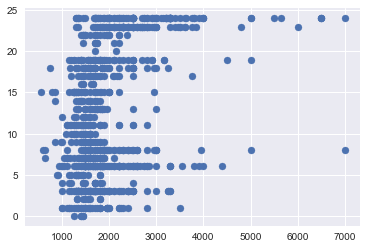

In [346]:
x = df_monthly_rates['price']
y = df_monthly_rates['area']
plt.scatter(x, y)
plt.show()

Going to remove the > 6000/month outliers

In [347]:
df_monthly_rates = df_monthly_rates[df_monthly_rates.price < 6000]

#### Histograms

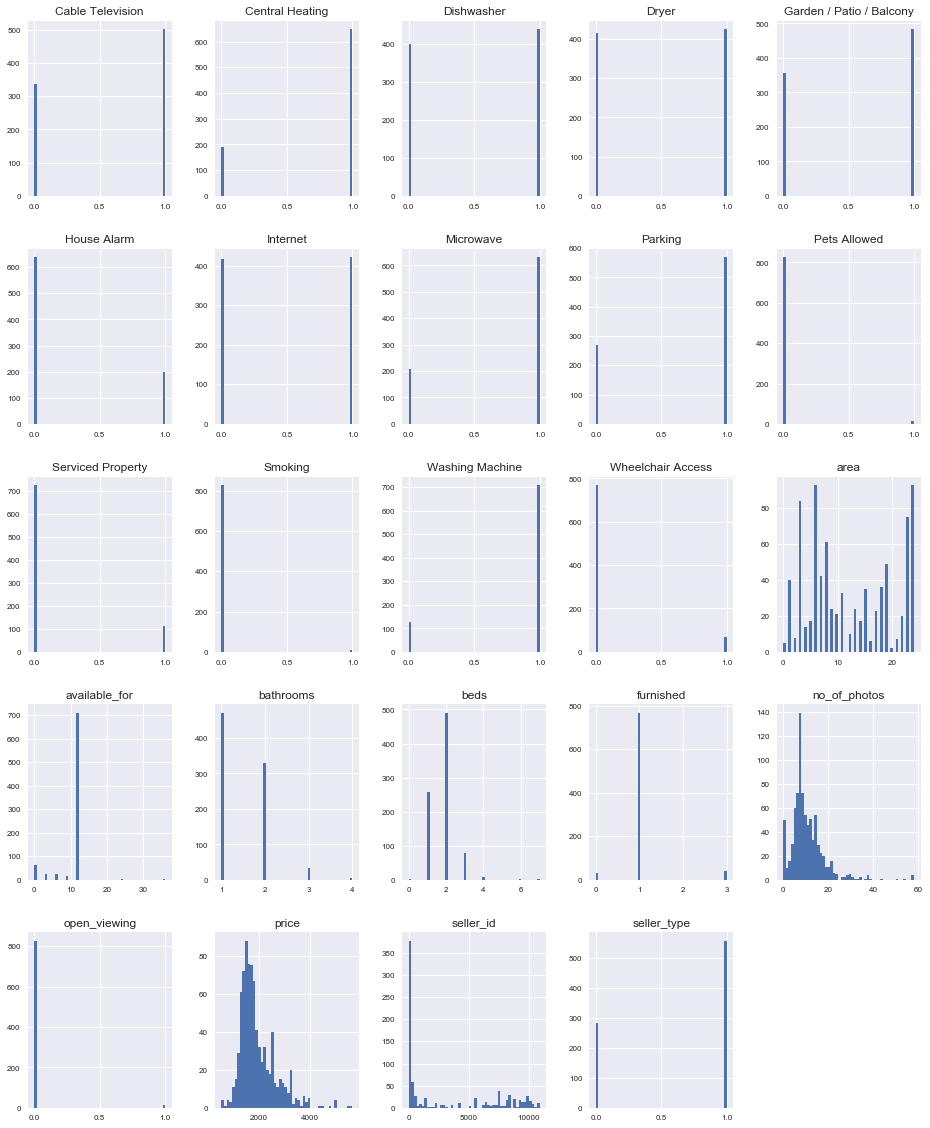

In [367]:
df_monthly_rates.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

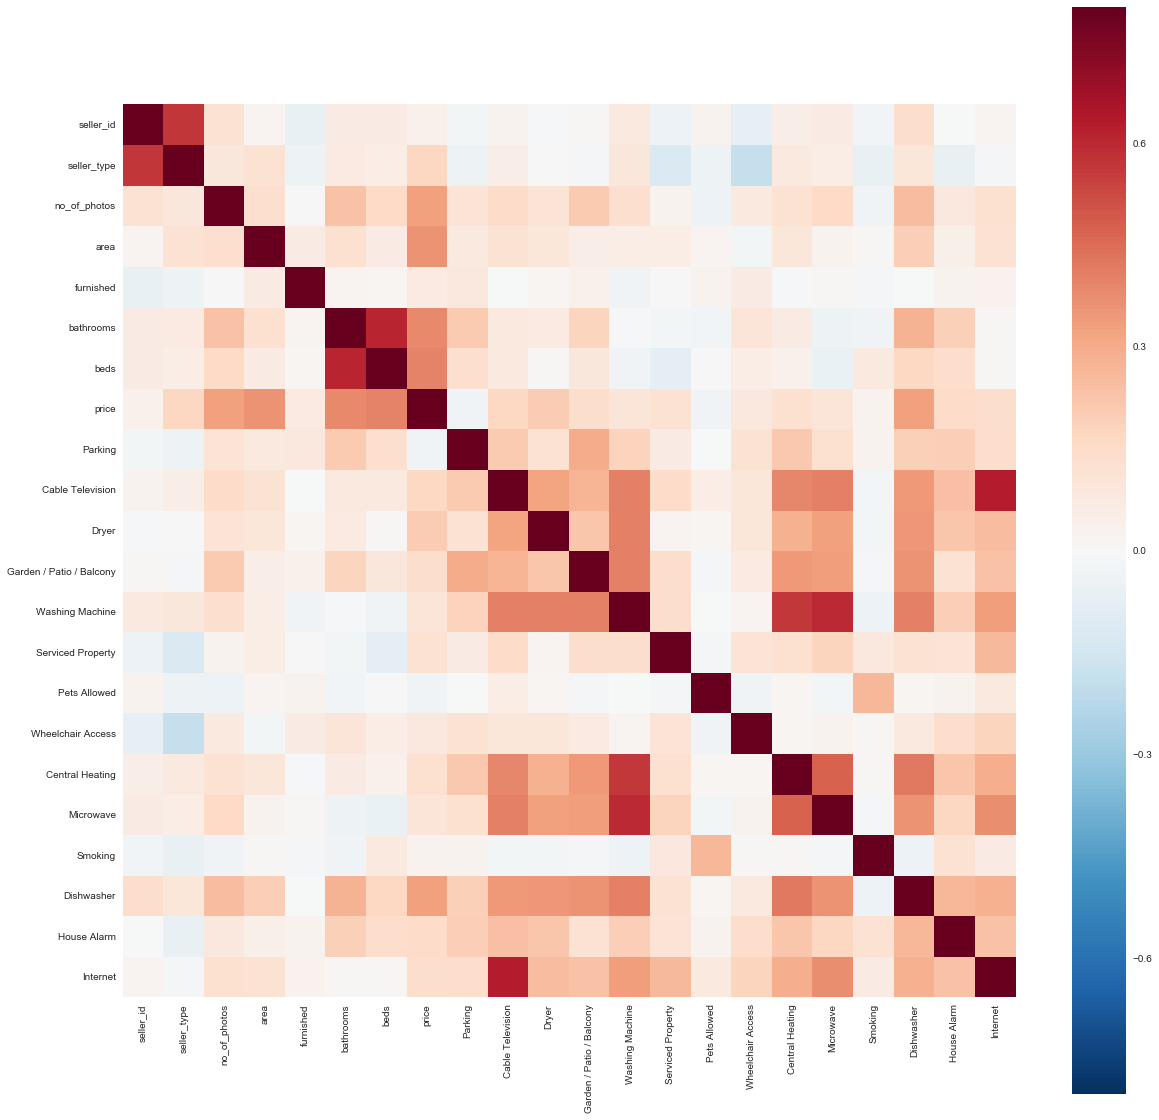

In [349]:
#correlation matrix
corrmat = df_monthly_rates.drop('available_for', 1).drop('open_viewing', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

# plt.figure(figsize=(10,10))
# foo = sns.heatmap(corrmat.corr(), vmax=0.8, square=True, annot=True)

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [350]:
df_monthly_rates['price'].describe()

count     839.000000
mean     1938.426698
std       698.688826
min       550.000000
25%      1500.000000
50%      1750.000000
75%      2200.000000
max      5650.000000
Name: price, dtype: float64

In [351]:
expensives = df_monthly_rates.loc[df_monthly_rates['price'] > 6000]
print(expensives['price'])
print(expensives['property_title'])

Series([], Name: price, dtype: float64)
Series([], Name: property_title, dtype: object)


#### Show price distibution for number of bathrooms

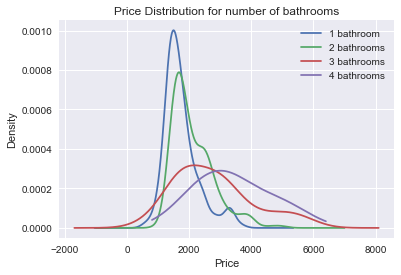

In [352]:
df_monthly_rates.price[(df_monthly_rates.bathrooms == 1.0)].plot(kind='kde', label='1 bathroom')    
df_monthly_rates.price[(df_monthly_rates.bathrooms == 2.0)].plot(kind='kde', label='2 bathrooms')      
df_monthly_rates.price[(df_monthly_rates.bathrooms == 3.0)].plot(kind='kde', label='3 bathrooms')      
df_monthly_rates.price[(df_monthly_rates.bathrooms == 4.0)].plot(kind='kde', label='4 bathrooms')    

plt.xlabel("Price")    
plt.title("Price Distribution for number of bathrooms")

plt.legend()

#### Price Distribution per area

In [353]:
print(areas_dict)
grouped = df_monthly_rates.groupby('area').area.count()
grouped.sort_values(ascending=False)


{'Dublin 10': 0.0, 'Dublin 7': 1.0, 'Dublin 17': 2.0, 'Dublin 8': 3.0, 'Dublin 13': 4.0, 'Dublin 22': 5.0, 'Dublin 1': 6.0, 'Dublin 15': 7.0, 'South of Dublin': 8.0, 'West of Dublin': 9.0, 'Dublin 24': 10.0, 'North of Dublin': 11.0, 'Dublin 12': 12.0, 'Dublin 3': 13.0, 'Dublin 11': 14.0, 'Dublin 9': 15.0, 'Dublin 20': 16.0, 'Dublin 14': 17.0, 'Dublin 6': 18.0, 'Dublin 18': 19.0, 'Dublin 5': 20.0, 'Dublin 16': 21.0, 'Dublin 6W': 22.0, 'Dublin 2': 23.0, 'Dublin 4': 24.0}


area
24.0    93
6.0     93
3.0     84
23.0    75
8.0     61
19.0    49
7.0     42
1.0     40
18.0    36
15.0    35
11.0    33
9.0     24
13.0    24
17.0    23
10.0    21
22.0    20
5.0     17
14.0    17
4.0     14
12.0    10
2.0      8
21.0     7
16.0     6
0.0      5
20.0     2
Name: area, dtype: int64

There is a lot of area noise, i.e. 'area' values that only occur in a handful of adds. 
Maybe these need to be consolidated/grouped together with other areas? 
Maybe group by post code only?

#### Showing price distribution for the most common areas

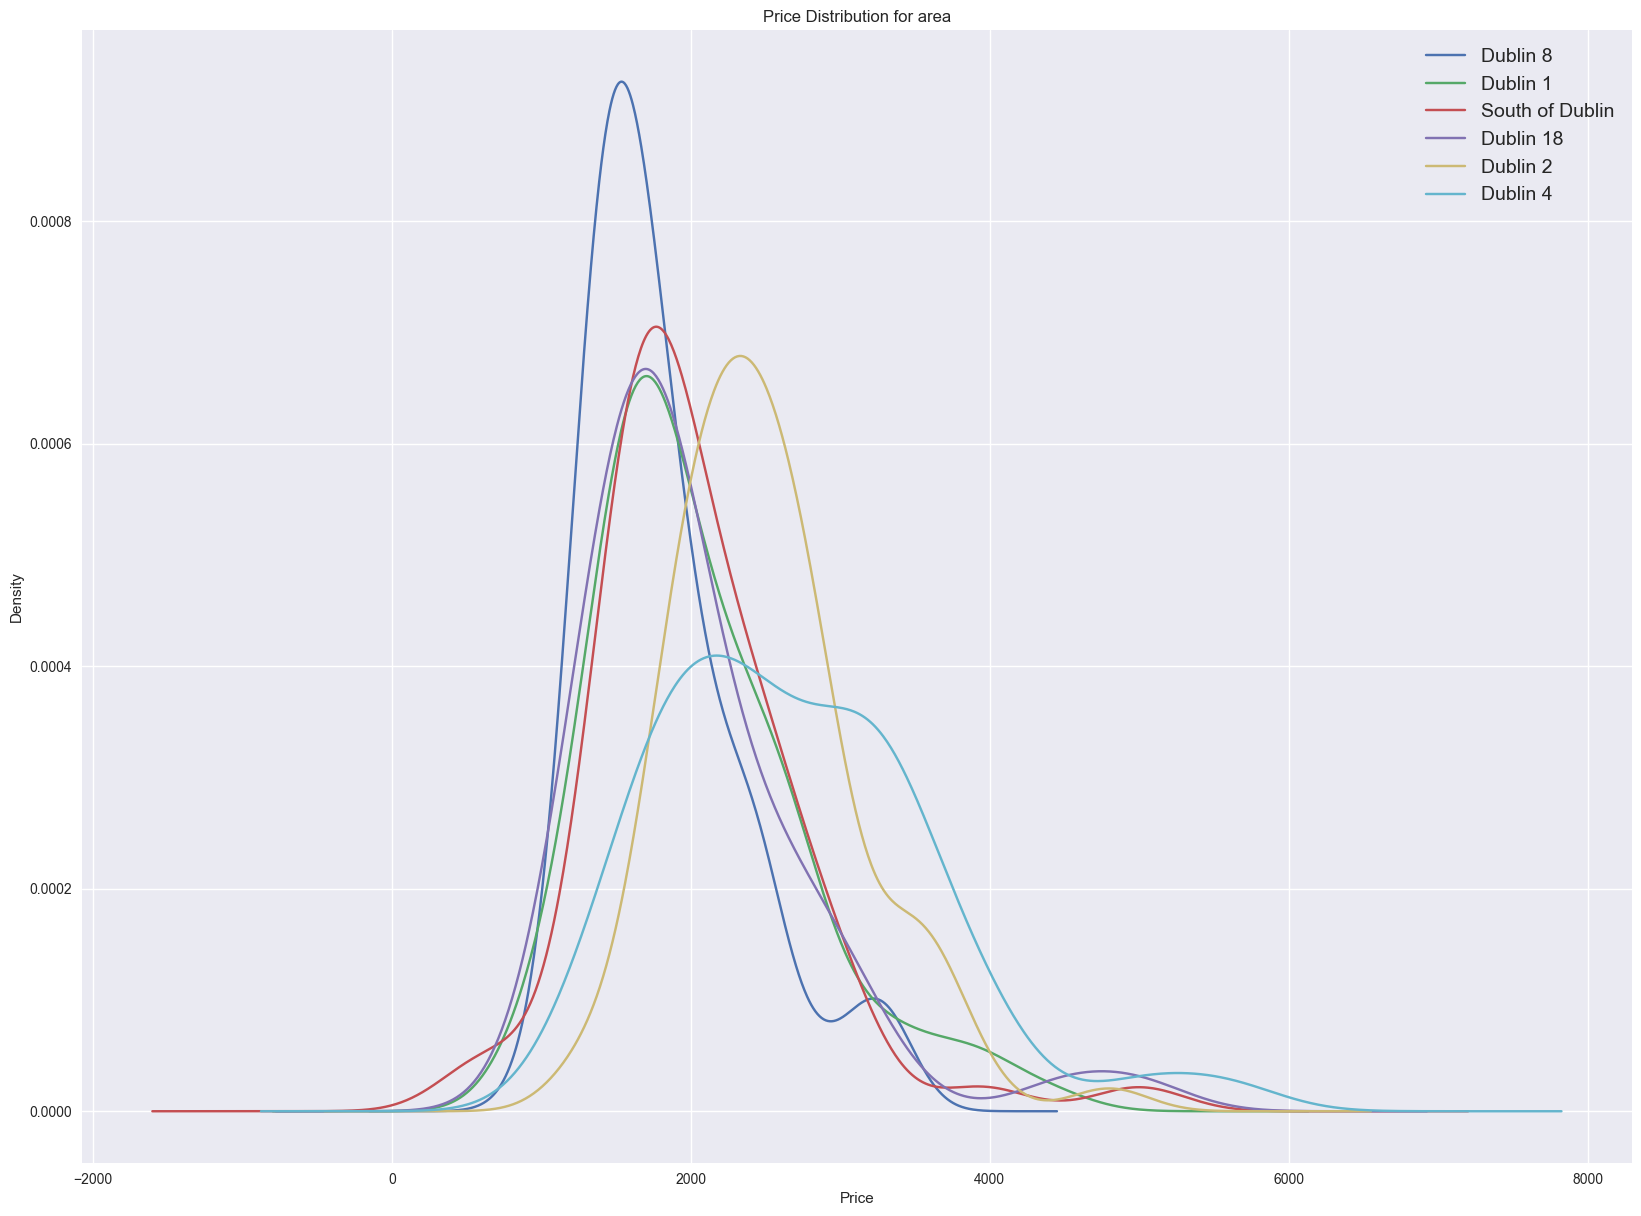

In [366]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if count > 45:
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

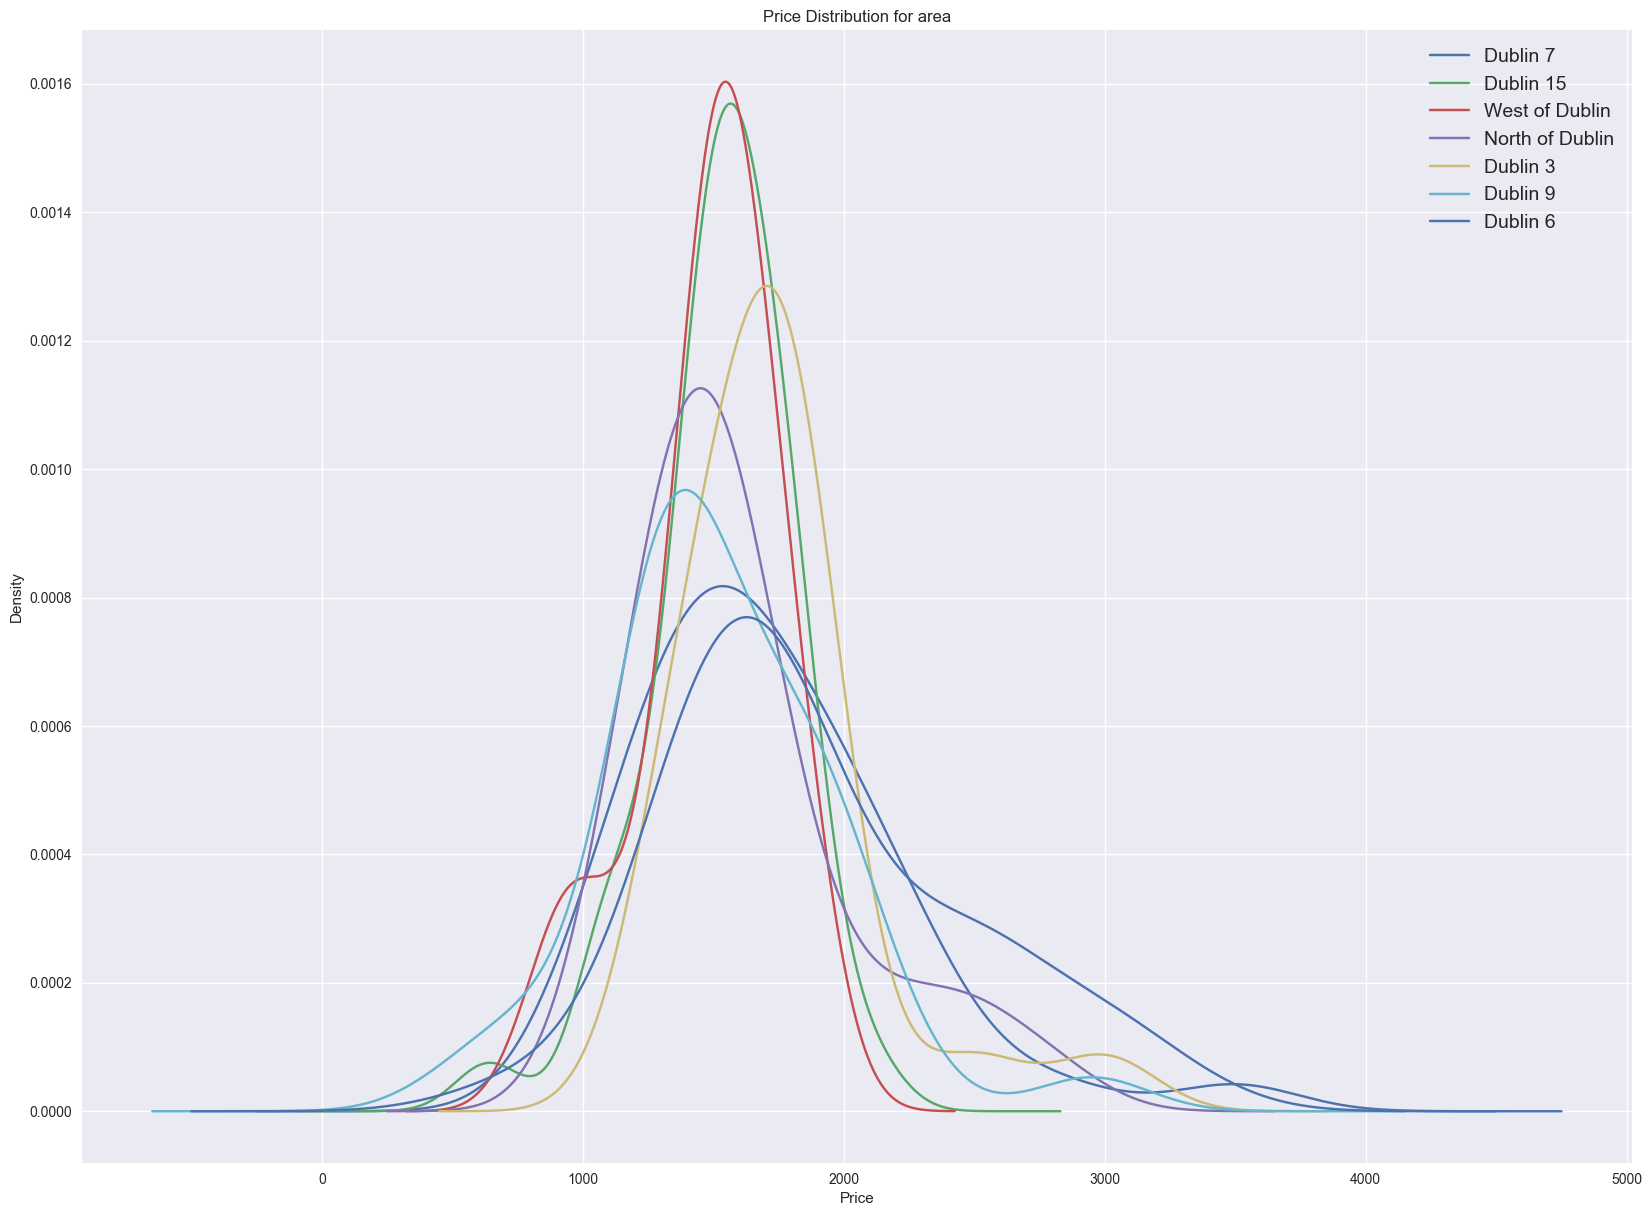

In [365]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly_rates.price[(df_monthly_rates.area == value)])
    if (count > 23) & (count <= 45 ):
        df_monthly_rates.price[(df_monthly_rates.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})